##### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

%matplotlib inline

import warnings

#Ignore all warnings
warnings.filterwarnings('ignore')



##### Import the data

In [30]:
df= pd.read_csv('financial_loan.csv')

In [31]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


## Exploratory Data analysis

In [32]:
df.shape

(38576, 24)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [34]:
df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


In [35]:
df.isnull().sum()


id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [83]:
df.annual_income.max()

6000000.0

In [36]:
df.duplicated().sum()

0

In [37]:
df['home_ownership'].replace('NONE', 'OTHER', inplace= True)

In [38]:
df['issue_date'] = pd.to_datetime(df['issue_date'], format="%d-%m-%Y")
df['last_credit_pull_date'] = pd.to_datetime(df['last_credit_pull_date'], format="%d-%m-%Y")
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'], format="%d-%m-%Y")
df['next_payment_date'] = pd.to_datetime(df['next_payment_date'], format="%d-%m-%Y")



In [39]:
df.home_ownership.value_counts()

home_ownership
RENT        18439
MORTGAGE    17198
OWN          2838
OTHER         101
Name: count, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

## Data Analysis

<Axes: ylabel='proportion'>

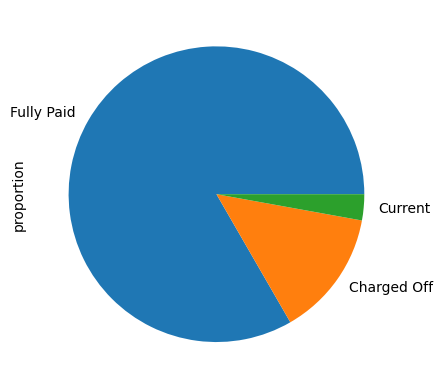

In [41]:
 # Analysis loan_status

df['loan_status'].value_counts(normalize=True).plot(kind='pie')


array([[<Axes: title={'center': 'annual_income'}>,
        <Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'installment'}>],
       [<Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'total_acc'}>],
       [<Axes: title={'center': 'total_payment'}>, <Axes: >, <Axes: >]],
      dtype=object)

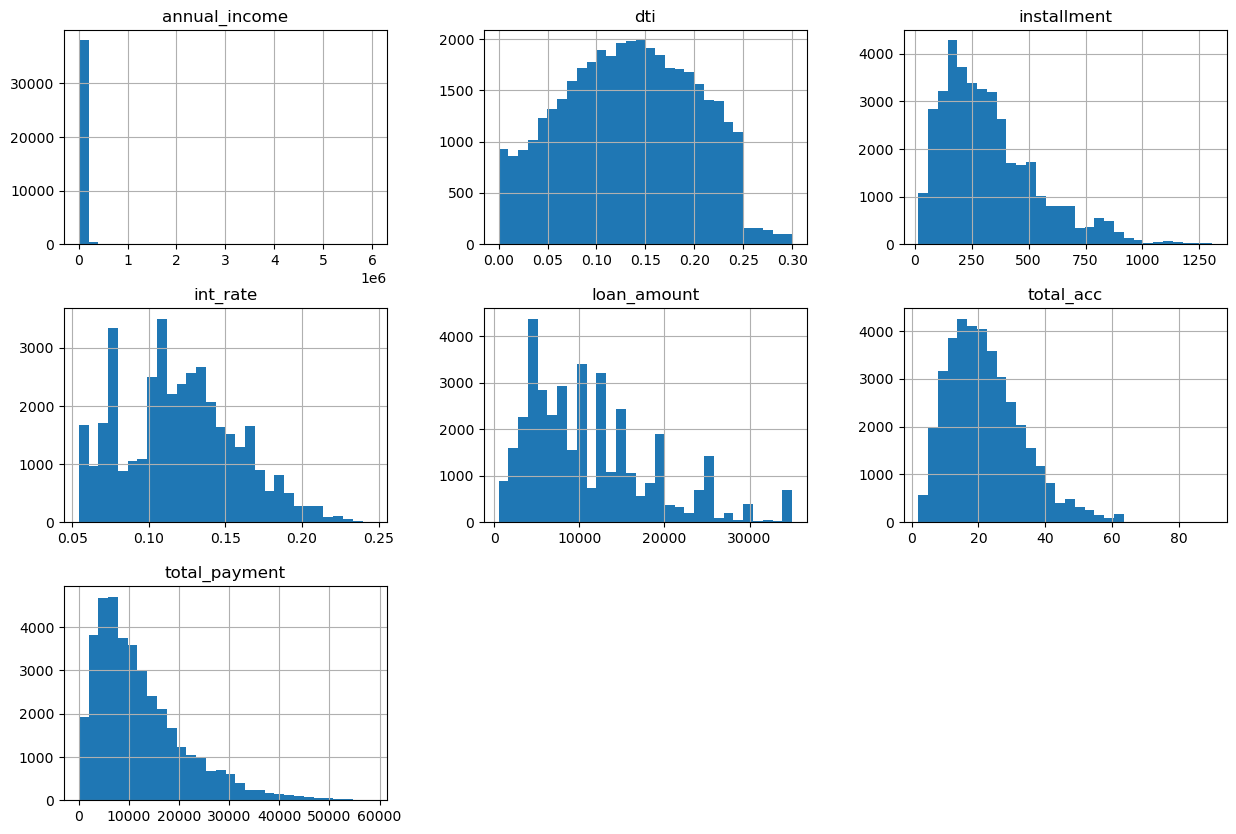

In [42]:
# Plot histograms for numerical columns to check distribution

num_cols = ['annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment']
df[num_cols].hist(bins=30, figsize=(15, 10))


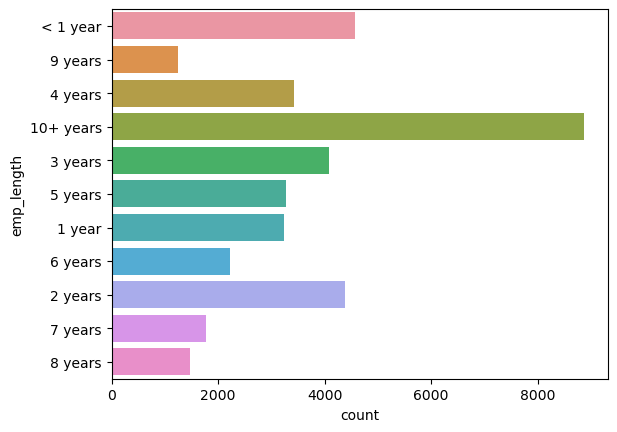

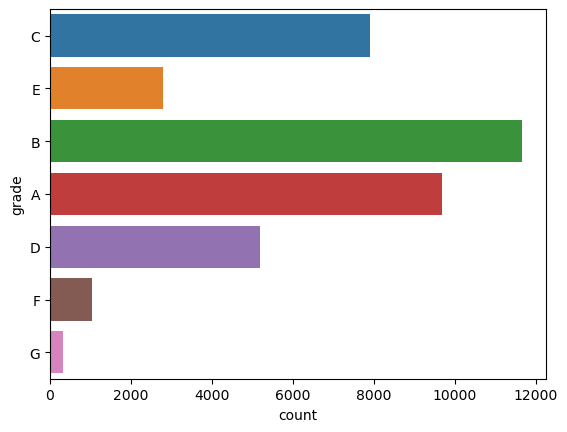

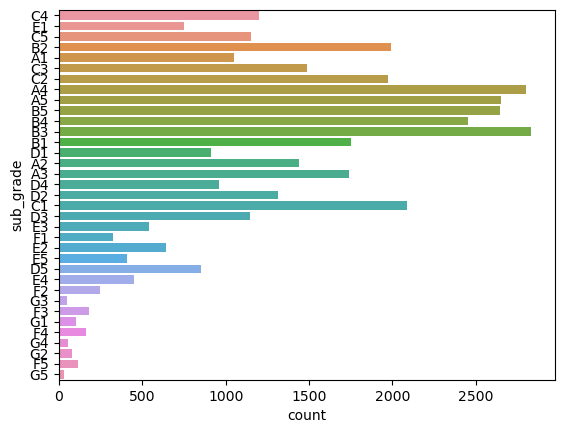

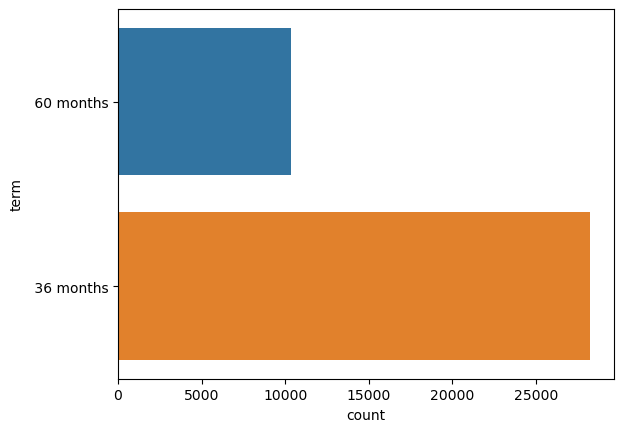

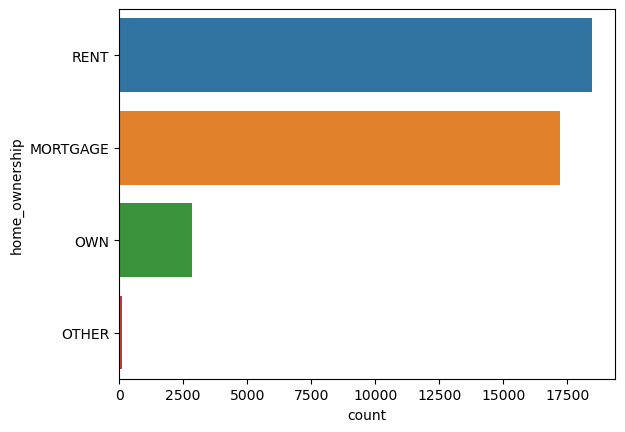

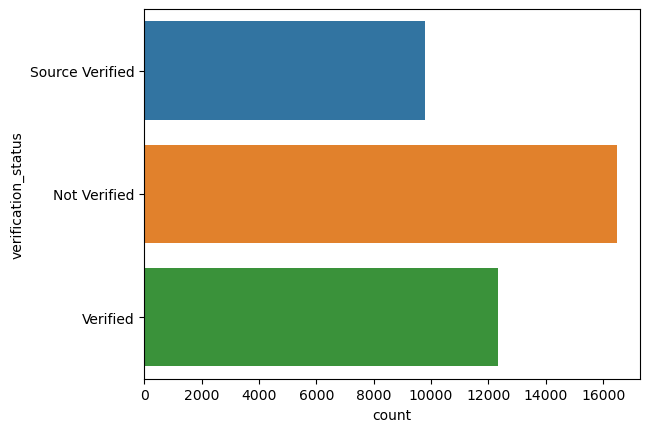

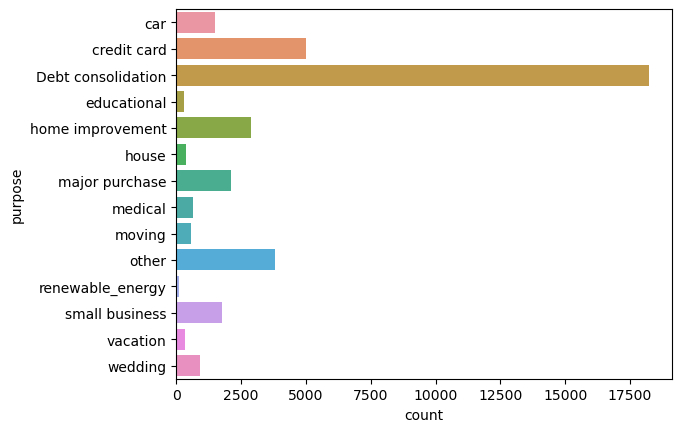

In [43]:
# Countplot for categorical columns

cat_cols = ['emp_length', 'grade', 'sub_grade', 'term', 'home_ownership', 'verification_status', 'purpose']
for col in cat_cols:
    sns.countplot(y=col, data=df)
    plt.show()


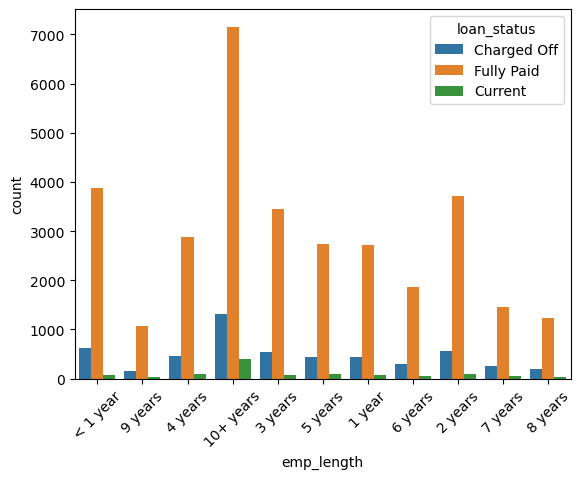

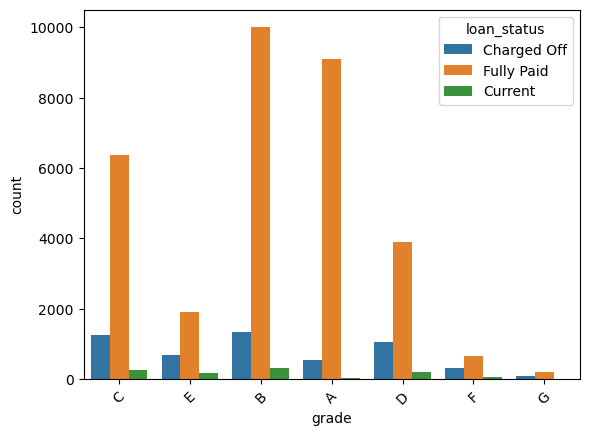

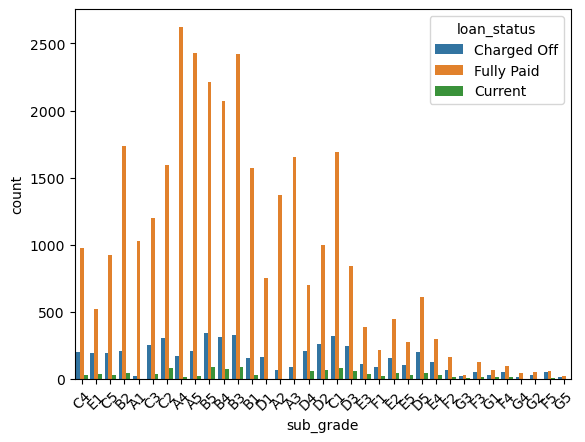

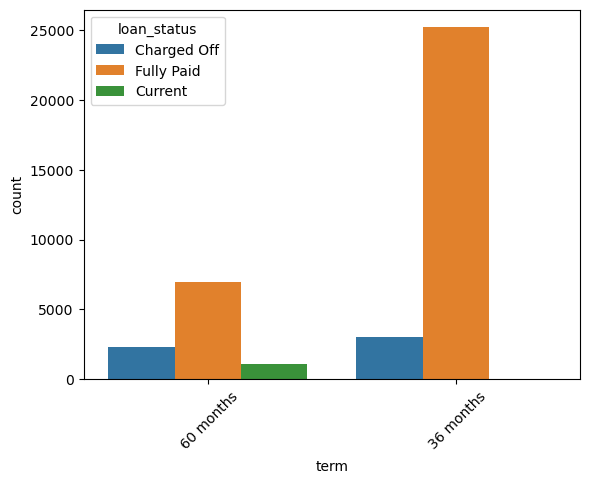

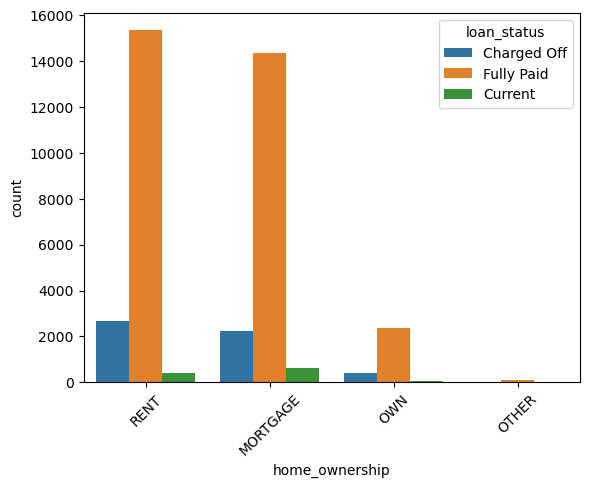

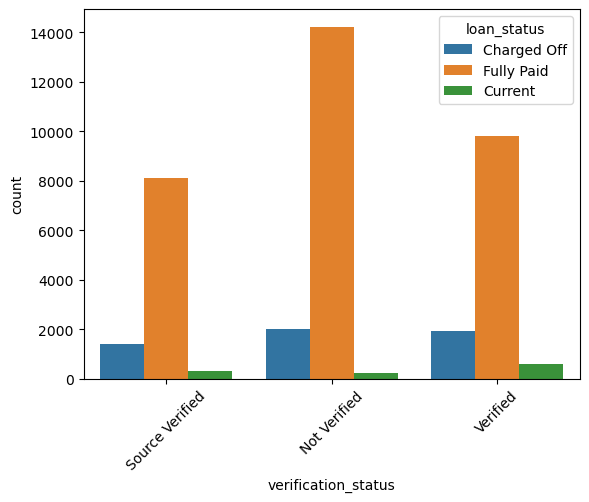

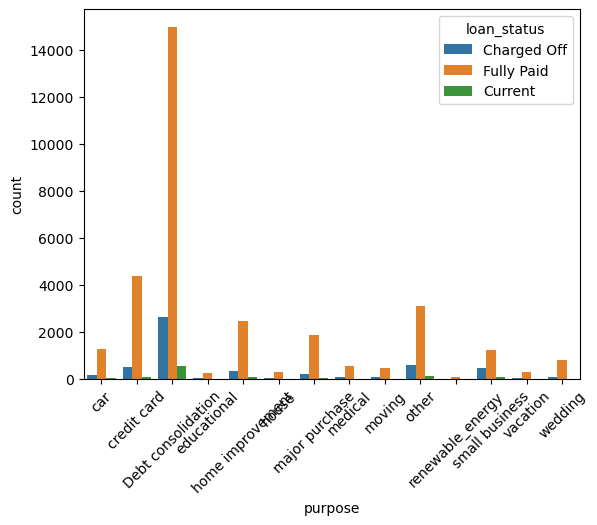

In [44]:
# Stacked bar chart for cat_columns and loan_status(target)

for col in cat_cols:
    sns.countplot(data=df, x=col, hue='loan_status')
    plt.xticks(rotation=45)
    plt.show()


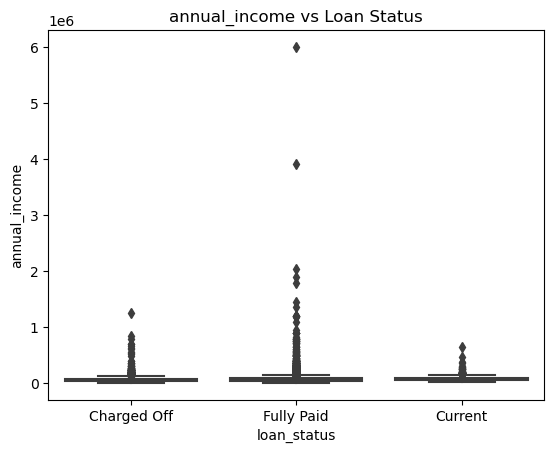

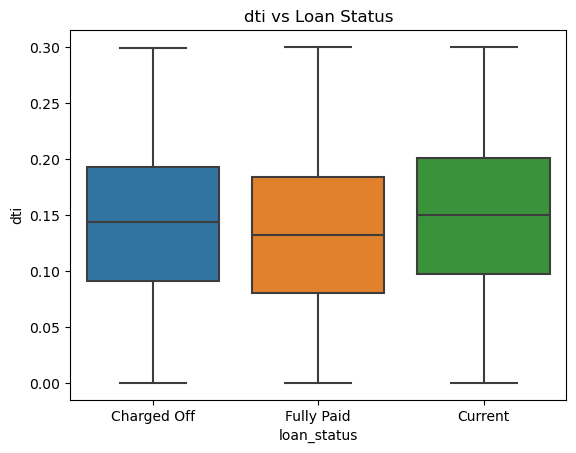

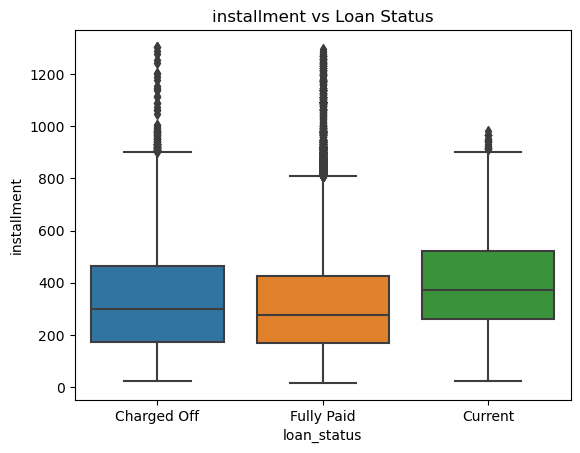

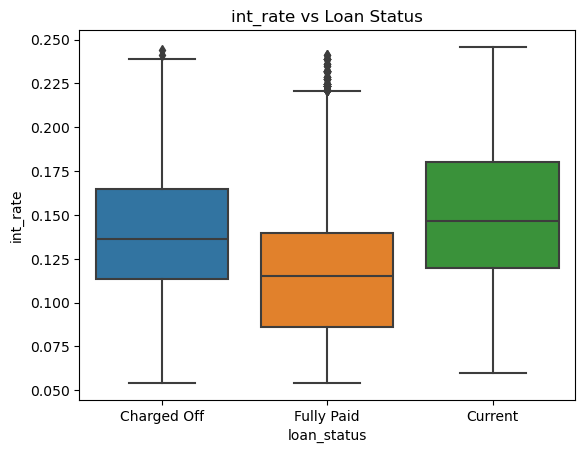

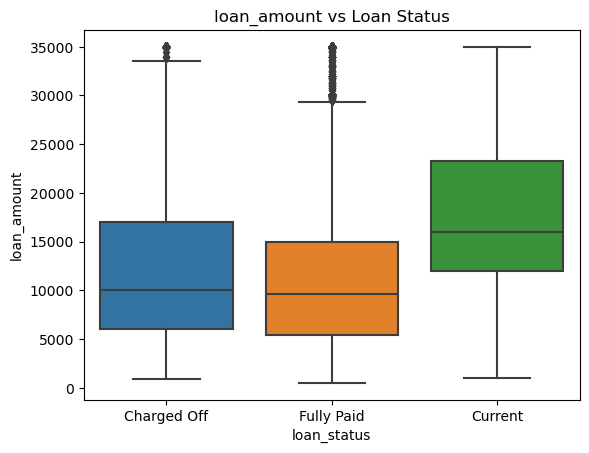

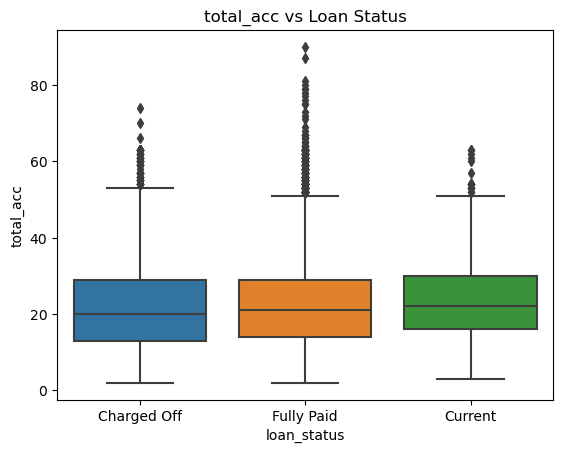

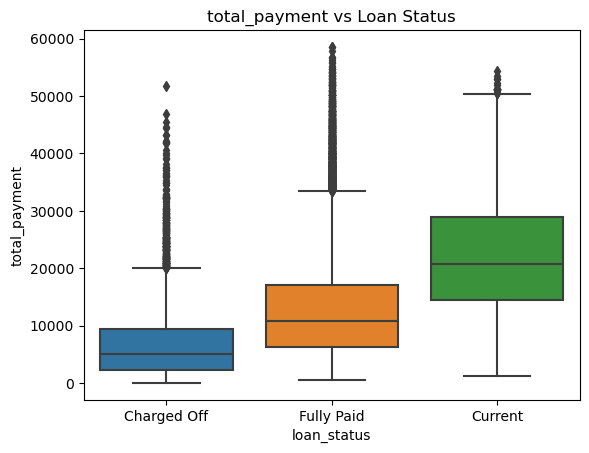

In [45]:
# Boxplot for numerical columns and loan_status(target)

for col in num_cols:
    sns.boxplot(x='loan_status', y=col, data=df)
    plt.title(f"{col} vs Loan Status")
    plt.show()


<Axes: >

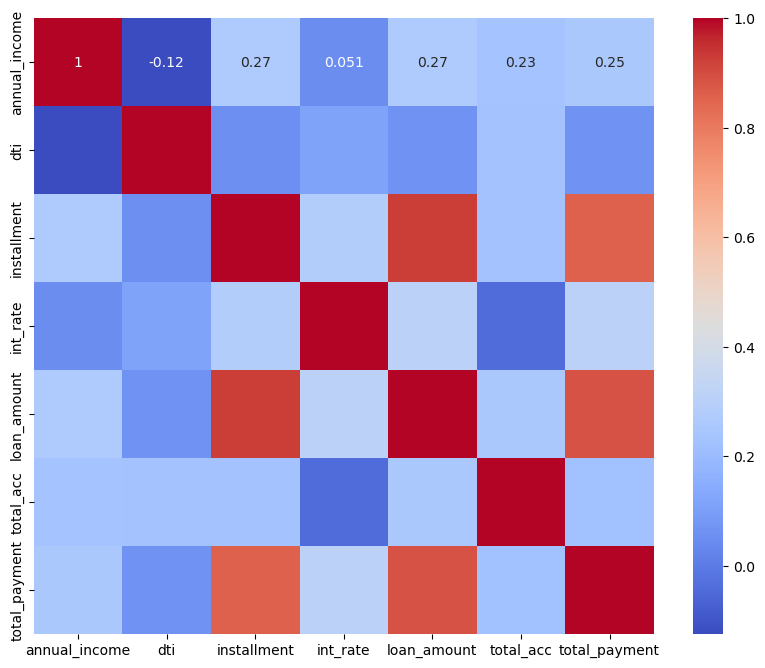

In [46]:
# Correlation heatmap for numerical columns

corr = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [47]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

<Axes: xlabel='issue_month'>

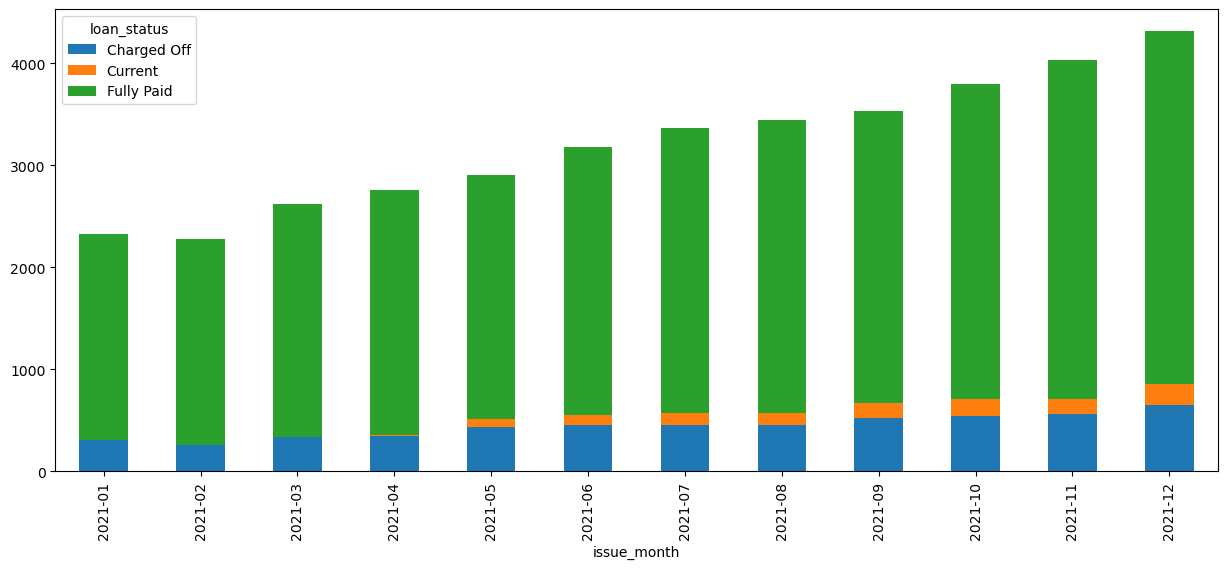

In [48]:
# loan_status based on months

df['issue_month'] = df['issue_date'].dt.to_period("M")

monthly_counts = df.groupby(['issue_month', 'loan_status']).size().unstack()
monthly_counts.plot(kind='bar', stacked=True, figsize=(15, 6))


<Axes: xlabel='address_state'>

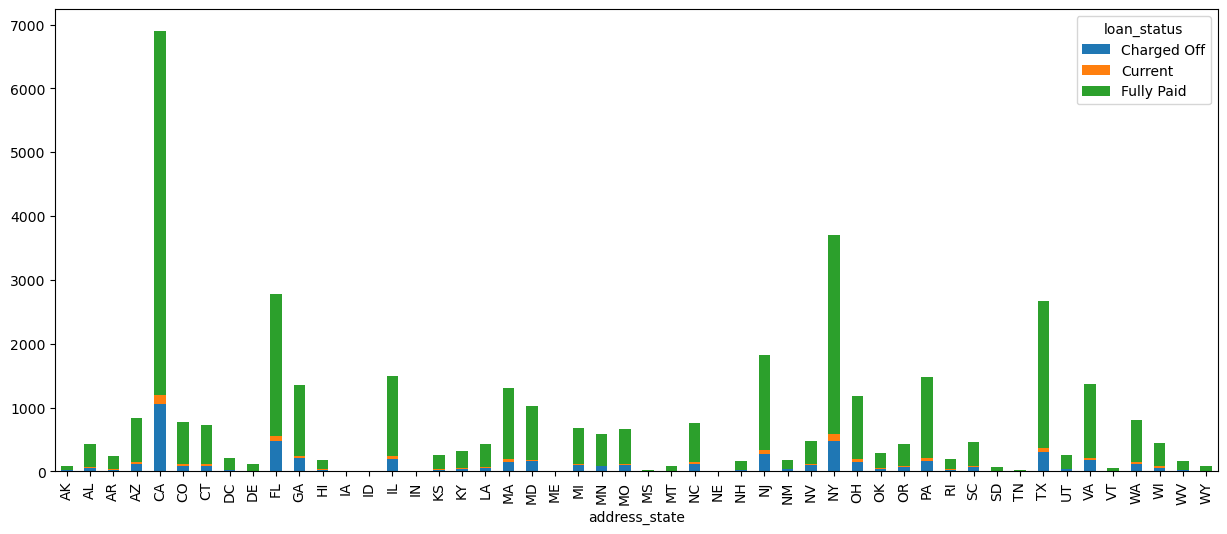

In [49]:
# Area wise loan status

state_summary = df.groupby(['address_state', 'loan_status']).size().unstack().fillna(0)
state_summary.plot(kind='bar', stacked=True, figsize=(15, 6))


<Axes: title={'center': 'Default Rate by Grade'}, xlabel='grade'>

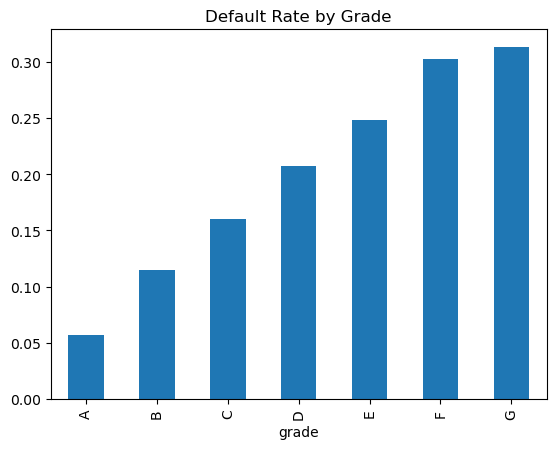

In [50]:
# Grade wise defaulted loans

default_rate = df[df['loan_status'] == 'Charged Off'].groupby('grade').size() / df.groupby('grade').size()
default_rate.plot(kind='bar', title='Default Rate by Grade')


<Axes: title={'center': 'Default Rate by home_ownership'}, xlabel='home_ownership'>

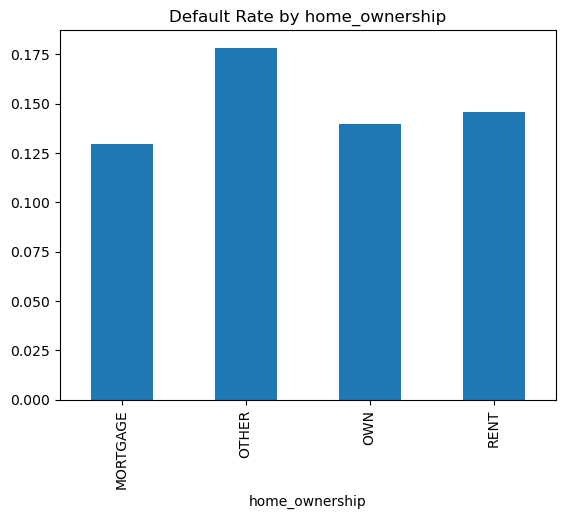

In [51]:
# Defaulted loans by home ownership

default_rate = df[df['loan_status'] == 'Charged Off'].groupby('home_ownership').size() / df.groupby('home_ownership').size()
default_rate.plot(kind='bar', title='Default Rate by home_ownership')


<Axes: title={'center': 'Default Rate by emp_length'}, xlabel='emp_length'>

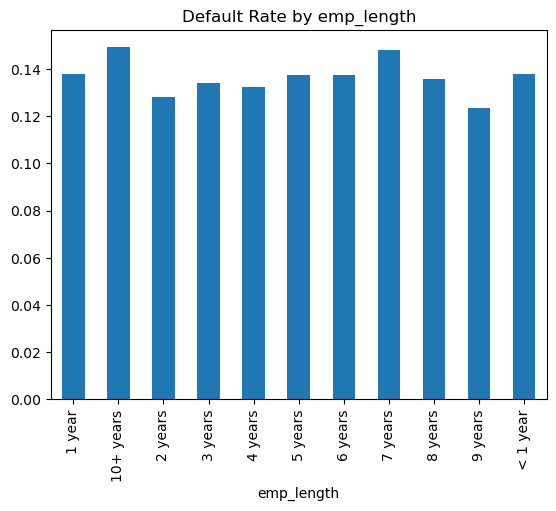

In [52]:
# Defaulted loans by employment length

default_rate = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').size() / df.groupby('emp_length').size()
default_rate.plot(kind='bar', title='Default Rate by emp_length')


<Axes: title={'center': 'Default Rate by home_ownership'}, xlabel='address_state'>

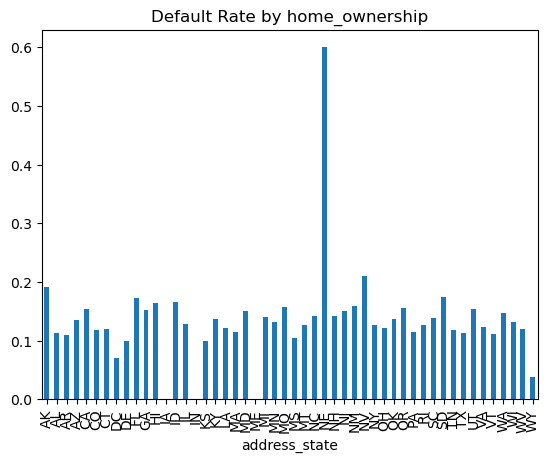

In [53]:
# Defaulted loans by state

default_rate = df[df['loan_status'] == 'Charged Off'].groupby('address_state').size() / df.groupby('address_state').size()
default_rate.plot(kind='bar', title='Default Rate by home_ownership')


In [54]:
# Check Outliers in numerical columns

In [55]:
df.select_dtypes(include=['float64', 'int64']).columns

Index(['id', 'member_id', 'annual_income', 'dti', 'installment', 'int_rate',
       'loan_amount', 'total_acc', 'total_payment'],
      dtype='object')

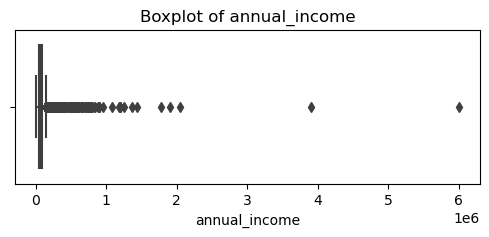

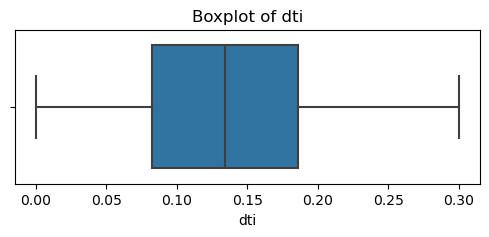

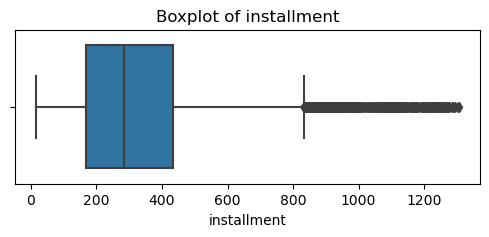

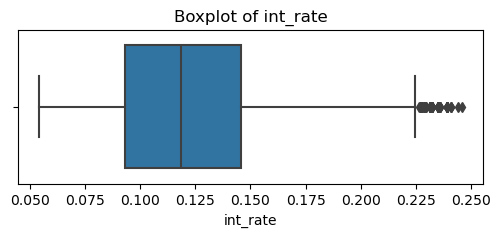

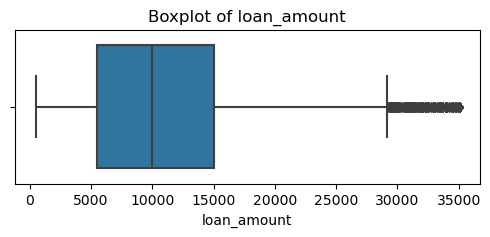

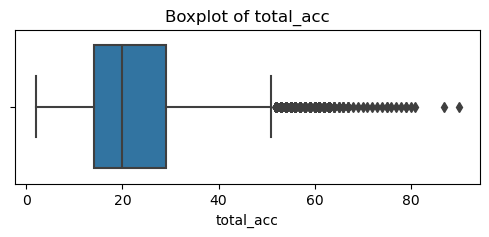

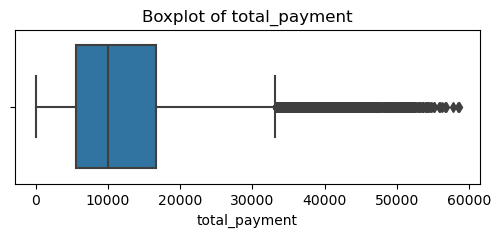

In [56]:
num_cols = [ 'annual_income', 'dti', 'installment', 'int_rate',
       'loan_amount', 'total_acc', 'total_payment']

## Visualize the outiers for above columns using boxplot

for col in num_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

W might skip outlier handling in this case:
- We are using XGBoost which is robust to outliers - Tree-based algorithms are not affected much by extreme values because they split on thresholds, not distance or mean.
- Removing outliers might remove valuable signals	Outliers could represent genuinely risky or high-value cases (e.g., very high-income borrowers defaulting).

## Model building for predicting default

In [57]:
# Drop loan_status-'Current' ( As wer are interested in 'Fully Paid' and 'Charged off'(default) Loans)

df1 = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]


In [58]:
df1.shape

(37478, 25)

In [59]:
df1.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment', 'issue_month'],
      dtype='object')

##### Encode the  categorical columns


In [60]:

df1['loan_status'] = df1['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})


In [61]:
emp_map = {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4,
           '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9,
           '10+ years': 10}
df1['emp_length'] = df1['emp_length'].map(emp_map)


In [62]:
from sklearn.preprocessing import OrdinalEncoder

grade_map = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}
df1['grade'] = df1['grade'].map(grade_map)
df1['sub_grade'] = OrdinalEncoder().fit_transform(df1[['sub_grade']])


In [63]:
df1 = pd.get_dummies(df1, columns=['home_ownership', 'verification_status', 'purpose', 'address_state'], drop_first=True)


In [64]:
#For boolean columns
bool_cols = df1.select_dtypes(include='bool').columns
df1[bool_cols] = df1[bool_cols].astype(int)

##### Derive the columns

In [65]:
 
df1['loan_age_days'] = (df1['last_payment_date'] - df1['issue_date']).dt.days
df1['credit_pull_lag_days'] = (df1['last_credit_pull_date'] - df1['issue_date']).dt.days


In [66]:
df1['term'] = df1['term'].str.extract('(\d+)').astype(int)


In [67]:
df1['loan_to_income'] = df1['loan_amount'] / df1['annual_income']


In [68]:
df1['payment_ratio'] = df1['total_payment'] / df1['loan_amount']


In [69]:
df1['interest_burden'] = df1['installment'] * df1['term'] - df1['loan_amount']


##### Drop columns not needed

In [70]:
df1.drop(columns= ['id', 'emp_title', 'member_id','issue_date' ,'last_payment_date', 'next_payment_date',
                   'issue_month', 'last_credit_pull_date'], inplace= True)

In [71]:
df1.application_type.value_counts()

application_type
INDIVIDUAL    37478
Name: count, dtype: int64

In [72]:
df1.drop(columns=['application_type'], inplace= True)

In [73]:
df1.fillna(df.median(numeric_only=True), inplace=True)


In [74]:
df1.columns

Index(['emp_length', 'grade', 'loan_status', 'sub_grade', 'term',
       'annual_income', 'dti', 'installment', 'int_rate', 'loan_amount',
       'total_acc', 'total_payment', 'home_ownership_OTHER',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit card', 'purpose_educational',
       'purpose_home improvement', 'purpose_house', 'purpose_major purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small business',
       'purpose_vacation', 'purpose_wedding', 'address_state_AL',
       'address_state_AR', 'address_state_AZ', 'address_state_CA',
       'address_state_CO', 'address_state_CT', 'address_state_DC',
       'address_state_DE', 'address_state_FL', 'address_state_GA',
       'address_state_HI', 'address_state_IA', 'address_state_ID',
       'address_state_IL', 'address_state_IN', 'address_state_KS',
 

##### Import Libraries

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns


##### Train-test split

In [76]:
X = df1.drop('loan_status', axis=1)
y = df1['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


##### Train the model

In [77]:
# Calculate scale_pos_weight = (# of negatives) / (# of positives)
scale = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale,
    random_state=42
)

xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

##### Predict

In [78]:
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:,1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      6429
           1       0.95      0.90      0.93      1067

    accuracy                           0.98      7496
   macro avg       0.97      0.95      0.96      7496
weighted avg       0.98      0.98      0.98      7496

Confusion Matrix:
 [[6382   47]
 [ 104  963]]
ROC AUC Score: 0.9842480979243684


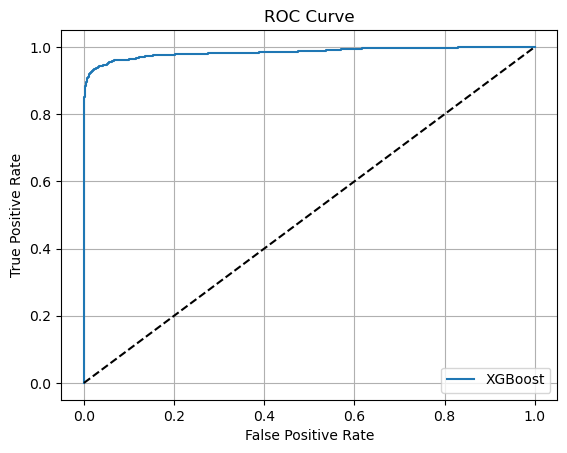

In [79]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [80]:
## Feature importance

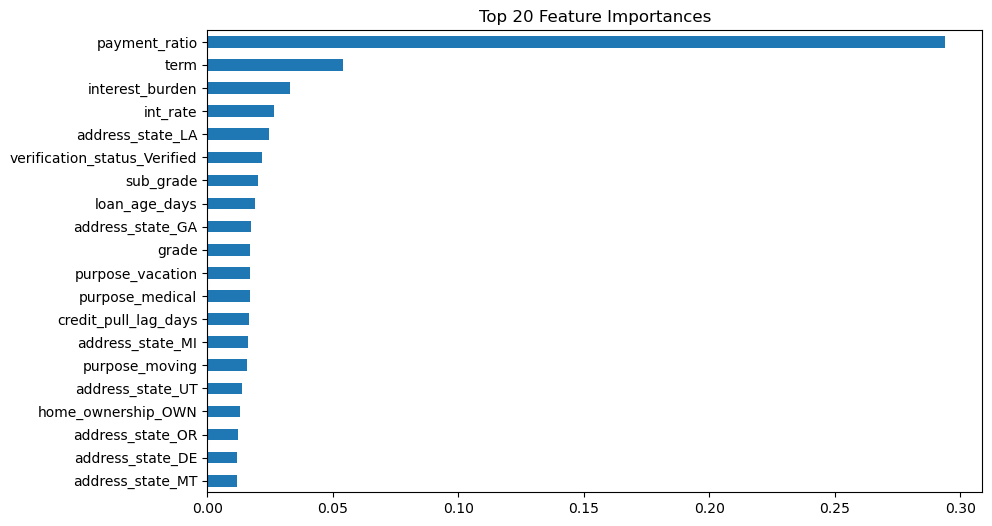

In [81]:
importances = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
importances.head(20).plot(kind='barh')
plt.title("Top 20 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


Results

- The model shows excellent performance with 98% overall accuracy and a ROC AUC of 0.98, indicating strong discriminatory power between good and bad loans.
-
  It correctly identifies 90% of actual defaulters (recall) with 95% precision, ensuring most predicted defaulters are truly risky. The confusion matrix confirms minimal false positives and false negatives.